# Ideas & Stuff that needs to be done:
- Good data splits
- Feature Importance
- Comparison of uncomplicated vs. complicated
- Do result visualization (e.g. ROC/AUC)
- Feature Selection comparison
- Include recommendations based on predictions

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
features = pd.read_csv('all_uti_features.csv', index_col = 'example_id')
prescrip = pd.read_csv('all_prescriptions.csv', index_col = 'example_id')
resistance = pd.read_csv('all_uti_resist_labels.csv', index_col = 'example_id')

### For us, resistance to SXT and CIP is the target variable to predict!

# Data Preprocessing

In [5]:
resistance

,NIT,SXT,CIP,LVX,is_train,uncomplicated
example_id,,,,,,
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,1.0,1.0,1,0
3,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...
116897,1.0,1.0,1.0,1.0,1,0
116898,NaN,NaN,0.0,0.0,1,0
116899,0.0,0.0,0.0,0.0,1,1


In [6]:
resistance['is_train'].shape

(116902,)

In [7]:
cip_df = resistance[resistance['CIP'].notna()][['CIP']].join(features)

In [8]:
cip_df

,SXT,demographics - age,demographics - is_white,demographics - is_veteran,micro - prev resistance LVX 14,micro - prev resistance AMP 14,micro - prev resistance CFZ 14,micro - prev resistance NIT 14,micro - prev resistance GEN 14,micro - prev resistance SXT 14,...,selected micro - colonization pressure NIT 90 - overall,selected micro - colonization pressure OXA 90 - overall,selected micro - colonization pressure PEN 90 - overall,selected micro - colonization pressure SAM 90 - overall,selected micro - colonization pressure SXT 90 - overall,selected micro - colonization pressure TET 90 - overall,selected micro - colonization pressure TZP 90 - overall,selected micro - colonization pressure VAN 90 - overall,is_train,uncomplicated
example_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,54,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.56,0.49,0.38,0.26,0.37,0.06,0.13,0,0
1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.19,0.78,0.83,0.33,0.20,0.35,0.18,0.13,1,0
2,0.0,89,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.66,0.51,0.50,0.25,0.37,0.05,0.12,1,0
3,0.0,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.23,0.47,0.50,0.25,0.26,0.35,0.06,0.12,1,0
4,0.0,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.50,0.49,0.33,0.25,0.37,0.05,0.10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116896,1.0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.22,0.49,0.49,0.30,0.25,0.35,0.07,0.11,1,0
116897,1.0,66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.49,0.54,0.33,0.25,0.35,0.09,0.10,1,0
116899,0.0,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.51,0.51,0.28,0.23,0.34,0.05,0.10,1,1


## Feature Reduction

In [9]:
cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('selected micro - ', regex=True, na=True)], axis = 1)

In [8]:
cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('14', regex=True, na=True)], axis = 1)
cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('30', regex=True, na=True)], axis = 1)
cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('90', regex=True, na=True)], axis = 1)
cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('180', regex=True, na=True)], axis = 1)

In [9]:
cip_y = cip_df[['CIP']]
cip_X = cip_df.drop('CIP', axis = 1)

## Divide into train & test data

- Don't touch the test data afterwards!
- Avoid having the same person in train & test data -> data leakage 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cip_X, cip_y)

## Feature Selection

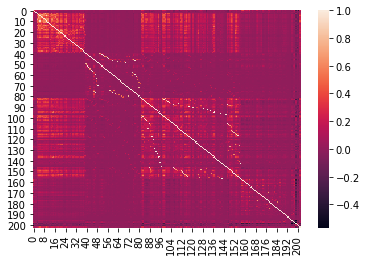

In [12]:
sns.heatmap(np.corrcoef(X_train.join(y_train), rowvar = False))

In [13]:
np.corrcoef(X_train.join(y_train), rowvar = False)[X_train.shape[1]]

array([ 2.08560356e-01,  2.18780954e-02,  9.20009456e-02,  1.71502317e-01,
        2.45723518e-01,  4.00535314e-01,  2.12243258e-01,  2.23836181e-01,
        2.37779684e-01,  2.38434143e-01,  4.02319778e-01,  2.42047650e-01,
        9.89194095e-02,  1.46013895e-01,  2.25904428e-01,  2.18838003e-01,
        1.55018842e-01,  1.79916575e-01,  2.09551603e-01,  2.37316938e-01,
        1.54444025e-01,  2.40441786e-01,  2.10480224e-01,  1.04679445e-01,
        1.45060224e-01,  2.53733130e-01,  1.16546049e-01,  1.03381926e-01,
        1.30009157e-01,  6.92232180e-02,  1.64138237e-01,  1.57473953e-01,
        1.38605273e-01,  1.68660484e-01,  7.98086917e-02,  1.54423216e-01,
        1.40233535e-01,  1.13781262e-01,  1.82968356e-01,  1.04753518e-01,
        1.66996164e-01,  4.11286535e-02,  4.51637246e-02,  2.27618579e-02,
        2.81597556e-02,  5.18318667e-02,  3.88587623e-02,  3.99053209e-02,
        2.31350239e-02,  6.72891863e-03,  1.39460765e-01,  9.28851469e-02,
        4.11286535e-02,  

In [14]:
from sklearn.decomposition import PCA

In [15]:
reduced = PCA(n_components = 0.9).fit_transform(X = cip_df.drop('CIP', axis = 1))

In [16]:
pd.DataFrame(reduced, index = cip_df.index)

,0
example_id,
0,1.137278
1,28.150111
2,-33.868219
3,6.157870
4,34.148804
...,...
116897,-10.926122
116898,-18.881526
116899,7.166175


## Construct "Blackbox" Models

Models to test & tune: 
- XGBoost
- Neural Net
- Random Forest
- Ensembles of all of them

In [17]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [18]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [19]:
xgb_mod = xgb.XGBClassifier(objective = 'binary:logistic')

In [20]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search_first = RandomizedSearchCV(xgb_mod, param_distributions=params, scoring = 'roc_auc', random_state=42, n_iter=5, cv=3, verbose=1, n_jobs=7, return_train_score=True)

search_first.fit(X_train, y_train)

report_best_scores(search_first.cv_results_, 1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  15 out of  15 | elapsed:  1.9min finished
C:\Users\benne\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\benne\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[18:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model with rank: 1
Mean validation score: 0.820 (std: 0.003)
Parameters: {'colsample_bytree': 0.8835558684167137, 'gamma': 0.06974693032602092, 'learning_rate': 0.11764339456056544, 'max_depth': 5, 'n_estimators': 114, 'subsample': 0.7824279936868144}



In [21]:
search_first.best_score_

0.8199328174876915

In [22]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score

In [23]:
accuracy_score(search_first.predict(X_test), y_test)

0.8318587266620924

In [24]:
roc_auc_score(search_first.predict(X_test), y_test)

0.7602030045346194

In [25]:
f1_score(search_first.predict(X_test), y_test)

0.5029888983774552

In [26]:
confusion_matrix(search_first.predict(X_test), y_test)

array([[20679,  3463],
       [ 1193,  2356]], dtype=int64)

In [27]:
from sklearn.linear_model import LogisticRegression


In [28]:
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\benne\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\benne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
accuracy_score(lr.predict(X_test), y_test)

0.8297280704922176

In [30]:
f1_score(lr.predict(X_test), y_test)

0.49109552077711816

In [31]:
confusion_matrix(lr.predict(X_test), y_test)

array([[20701,  3544],
       [ 1171,  2275]], dtype=int64)

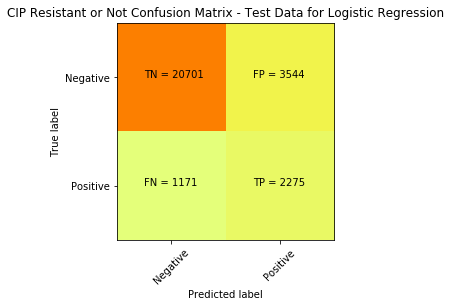

In [32]:
cm = confusion_matrix(lr.predict(X_test), y_test)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('CIP Resistant or Not Confusion Matrix - Test Data for Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j-0.25,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier().fit(X_train, y_train)

C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [35]:
accuracy_score(rf.predict(X_test), y_test)

0.8342060597305984

In [36]:
f1_score(rf.predict(X_test), y_test)

0.5170926685600084

In [37]:
confusion_matrix(rf.predict(X_test), y_test)

array([[20642,  3361],
       [ 1230,  2458]], dtype=int64)